In [2]:
import io
import requests
from PIL import Image

In [3]:
url = "https://assets.speakcdn.com/assets/2941/westernpondturtle3161_mo.jpg"

resp = requests.get(url, stream=True)
img = Image.open(io.BytesIO(resp.content))

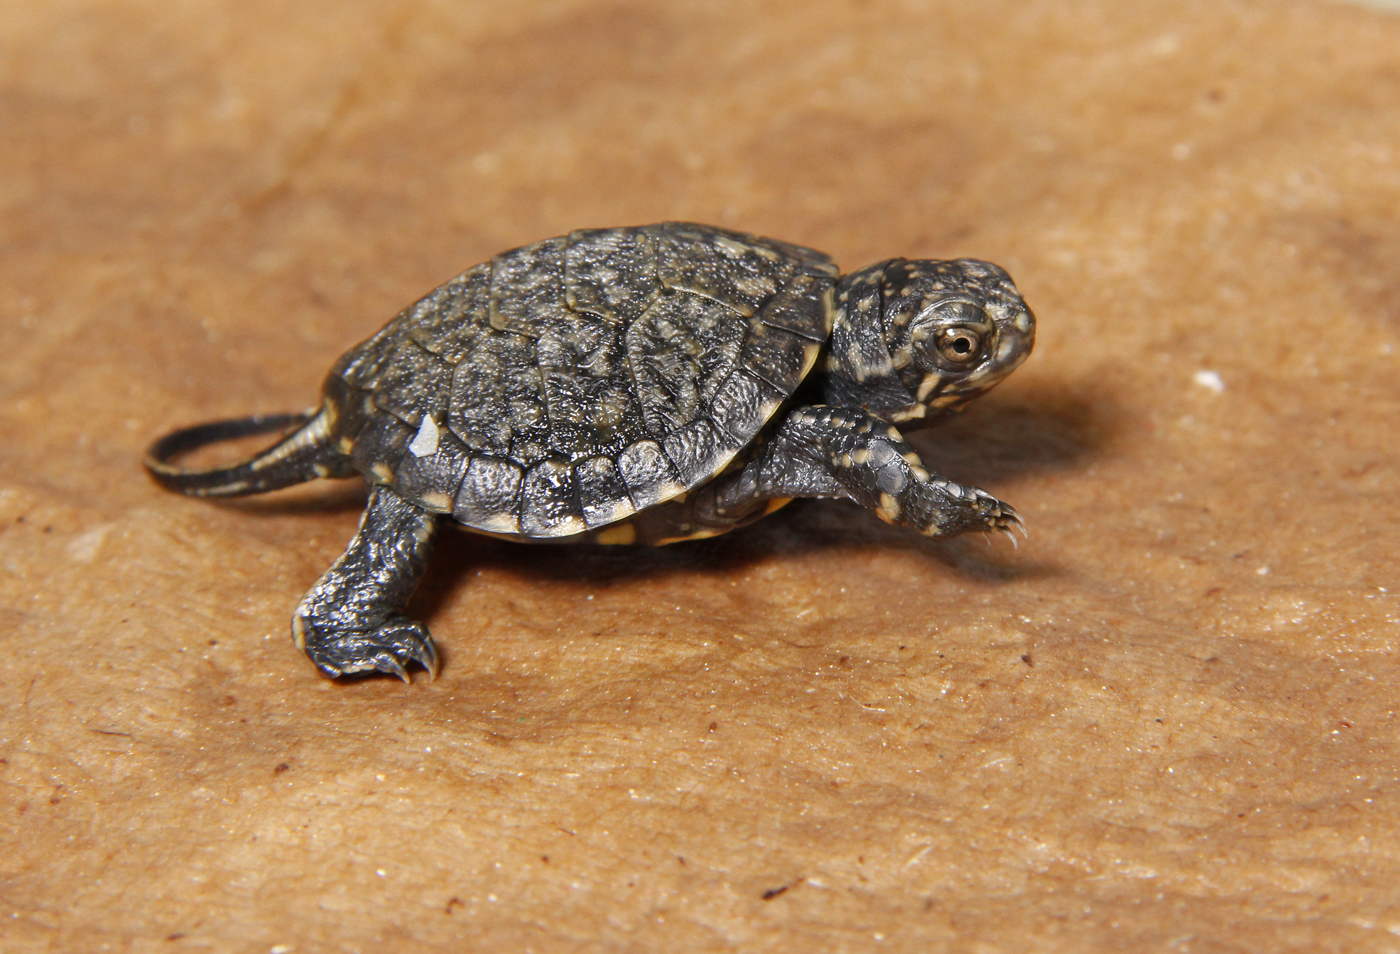

In [4]:
img

In [6]:
face = img.crop((800, 200, 1100, 500))

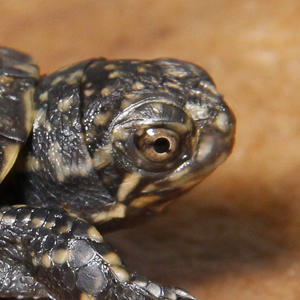

In [7]:
face

In [9]:
face.split()

(<PIL.Image.Image image mode=L size=300x300>,
 <PIL.Image.Image image mode=L size=300x300>,
 <PIL.Image.Image image mode=L size=300x300>)

This represents how much Red, Green, and Blue (RGB) was in the original image.

In [10]:
raw_color_bands = face.split()

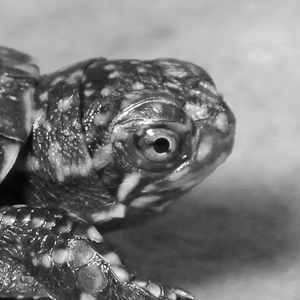

In [11]:
raw_color_bands[0]

In [12]:
bands = {'R': raw_color_bands[0], 'G': raw_color_bands[1], 'B': raw_color_bands[2]}

In [13]:
bands

{'R': <PIL.Image.Image image mode=L size=300x300>,
 'G': <PIL.Image.Image image mode=L size=300x300>,
 'B': <PIL.Image.Image image mode=L size=300x300>}

## Put bands back to recreate the image

In [18]:
list(bands.values())

[<PIL.Image.Image image mode=L size=300x300>,
 <PIL.Image.Image image mode=L size=300x300>,
 <PIL.Image.Image image mode=L size=300x300>]

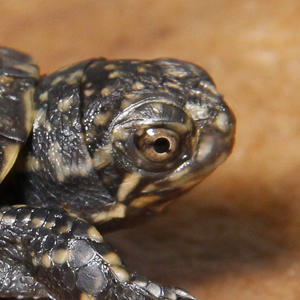

In [19]:
Image.merge(face.mode, list(bands.values()))

## Blue Turtle

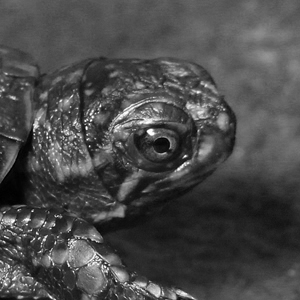

In [21]:
bands['B'] 

In [31]:
def twice_as_intense(pixel_value):
    return pixel_value * 2

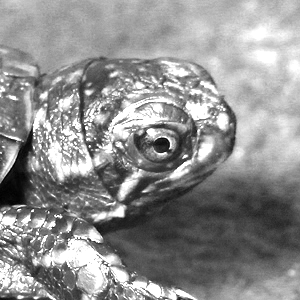

In [32]:
(bands['B']).point(twice_as_intense)

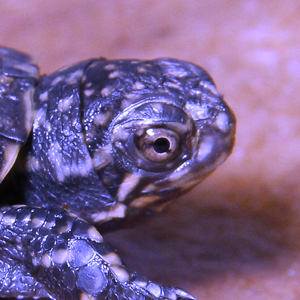

In [35]:
Image.merge(face.mode, (
    bands['R'],
    bands['G'],
    bands['B'].point(twice_as_intense)))

### Wipe out a color

In [40]:
def zero(pixel_value):
    return 0 

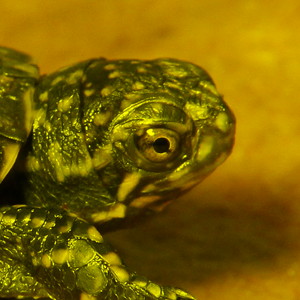

In [41]:
Image.merge(face.mode, (
    bands['R'],
    bands['G'],
    bands['B'].point(zero)))

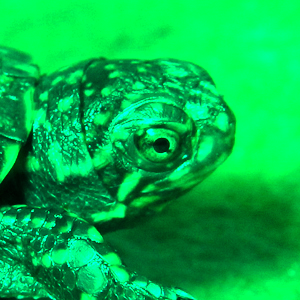

In [42]:
Image.merge(face.mode, (
    bands['R'].point(zero),
    bands['G'].point(twice_as_intense),
    bands['B']))

## Invert the blue

Each pixel value is 0 to 255, so... 

In [43]:
def invert(pixel_value):
    return 255 - pixel_value

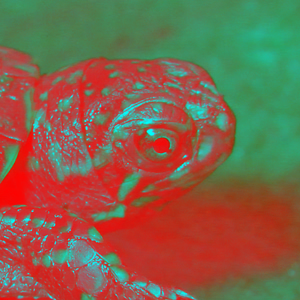

In [44]:
Image.merge(face.mode, (
    bands['R'].point(invert),
    bands['G'],
    bands['B']))